# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [6]:
cities

['hilo',
 'mitsamiouli',
 'mataura',
 'bredasdorp',
 'mana',
 'tongliao',
 'tiksi',
 'harvard',
 'kapaa',
 'hobart',
 'jatai',
 'punta arenas',
 'hami',
 'busselton',
 'kavaratti',
 'vila do maio',
 'berlevag',
 'makakilo city',
 'ushuaia',
 'nuuk',
 'bluff',
 'yulara',
 'petropavlovsk-kamchatskiy',
 'mandalgovi',
 'illoqqortoormiut',
 'tasbuget',
 'batagay',
 'uvat',
 'bardiyah',
 'bubaque',
 'chico',
 'kalabo',
 'sentyabrskiy',
 'felipe carrillo puerto',
 'imbituba',
 'yellowknife',
 'thompson',
 'puerto ayora',
 'longyearbyen',
 'sisimiut',
 'teya',
 'kitimat',
 'camacha',
 'sorong',
 'lagoa',
 'omboue',
 'saleaula',
 'kruisfontein',
 'krasnoselkup',
 'bethel',
 'qaanaaq',
 'mayya',
 'port hedland',
 'inuvik',
 'coihaique',
 'hermanus',
 'iracoubo',
 'lorengau',
 'saint-philippe',
 'barrow',
 'salamiyah',
 'saint george',
 'new norfolk',
 'ponta do sol',
 'hithadhoo',
 'tarudant',
 'katangli',
 'samusu',
 'port alfred',
 'taolanaro',
 'upernavik',
 'glens falls',
 'nikolskoye',
 'ta

In [7]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "carnarvon"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=707347a3a921e90ecfa9907c1e0aeed7&q=carnarvon'

In [8]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': 113.63, 'lat': -24.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.15, 'feels_like': 299.29, 'temp_min': 299.15, 'temp_max': 299.15, 'pressure': 1014, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 240}, 'clouds': {'all': 54}, 'dt': 1586522759, 'sys': {'type': 1, 'id': 9505, 'country': 'AU', 'sunrise': 1586471868, 'sunset': 1586513719}, 'timezone': 28800, 'id': 2074865, 'name': 'Carnarvon', 'cod': 200}.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
lat = []
lng = []
temp = []
cloudiness = []
country = []
date = []
Humidity = []
temp_max = []
wind_speed = []
city_name = []
# Get latitude and temperature for cities
# set up lists to hold reponse info
# records = 0-50
# sets = 1-15,,
record_counter = 0
set_counter = 0
records = []
sets = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

print(f"-----------------------------")
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
# Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))

    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 of set 0 | hilo
Processing record 2 of set 0 | mitsamiouli
Processing record 3 of set 0 | mataura
Processing record 4 of set 0 | bredasdorp
Processing record 5 of set 0 | mana
Processing record 6 of set 0 | tongliao
Processing record 7 of set 0 | tiksi
Processing record 8 of set 0 | harvard
Processing record 9 of set 0 | kapaa
Processing record 10 of set 0 | hobart
Processing record 11 of set 0 | jatai
Processing record 12 of set 0 | punta arenas
Processing record 13 of set 0 | hami
Processing record 14 of set 0 | busselton
Processing record 15 of set 0 | kavaratti
Processing record 16 of set 0 | vila do maio
Processing record 17 of set 0 | berlevag
Processing record 18 of set 0 | makakilo city
Processing record 19 of set 0 | ushuaia
Processing record 20 of set 0 | nuuk
Processing record 21 of set 0 | bluff
Processing record 22 of set 0 | yulara
Processing record 23 of set 0 | petro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
weather_data.count()

city          632
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [34]:
Dict= {
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": Humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
}
dict_df = pd.DataFrame({ key:pd.Series(value) for key, value in Dict.items() })
dict_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,90.0,US,1.586524e+09,83.0,19.73,-155.09,22.00,0.57
1,mitsamiouli,40.0,KM,1.586525e+09,66.0,-11.38,43.28,33.00,5.10
2,mataura,85.0,NZ,1.586525e+09,94.0,-46.19,168.86,7.78,0.45
3,bredasdorp,50.0,ZA,1.586525e+09,44.0,-34.53,20.04,26.00,4.60
4,mana,77.0,GF,1.586525e+09,79.0,5.66,-53.78,27.42,4.73


#### Latitude vs. Temperature Plot

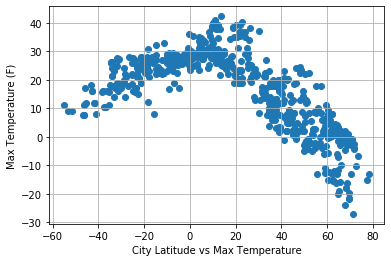

In [65]:
plt.scatter(dict_df["Lat"],dict_df["Max Temp"])
plt.grid()
plt.xlabel('City Latitude vs Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.show()

#### Latitude vs. Humidity Plot

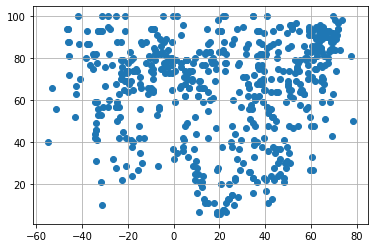

In [39]:
plt.scatter(dict_df["Lat"],dict_df["Humidity"])
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

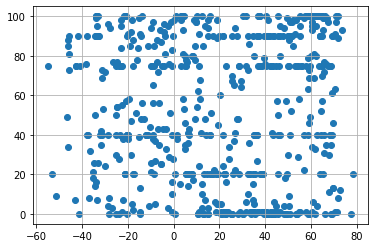

In [40]:
plt.scatter(dict_df["Lat"],dict_df["Cloudiness"])
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

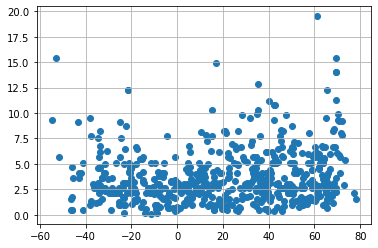

In [41]:
plt.scatter(dict_df["Lat"],dict_df["Wind Speed"])
plt.grid()
plt.show()

## Linear Regression

In [55]:
# OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_func(x_values,y_values,y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Lat')
    plt.ylabel(y_label)
    print(rvalue)
    plt.show()

In [56]:
# Create Northern and Southern Hemisphere DataFrames
n_df=dict_df.loc[dict_df["Max Temp"]>=0]
n_df.head(2)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,90.0,US,1.586524e+09,83.0,19.73,-155.09,22.0,0.57
1,mitsamiouli,40.0,KM,1.586525e+09,66.0,-11.38,43.28,33.0,5.10


In [57]:
s_df=dict_df.loc[dict_df["Max Temp"]<0]
s_df.head(2)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
6,tiksi,8.0,RU,1.586525e+09,94.0,71.69,128.87,-3.95,8.01
16,berlevag,97.0,NO,1.586525e+09,89.0,70.86,29.09,-0.90,9.20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

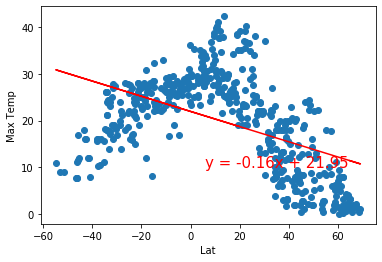

In [54]:
x_values=n_df['Lat']
y_values=n_df['Max Temp']
linear_func(x_values,y_values,"Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.35379752010231214


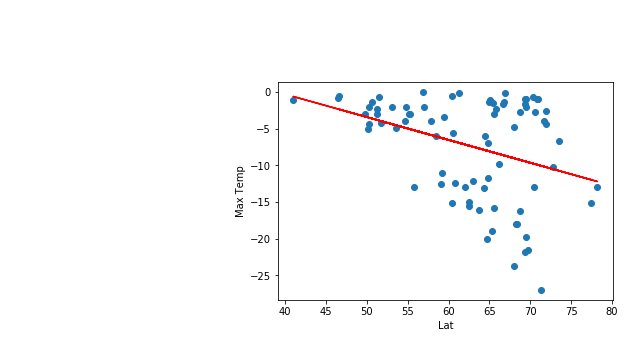

In [58]:
x_values=s_df['Lat']
y_values=s_df['Max Temp']
linear_func(x_values,y_values,"Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

-0.11083508120035984


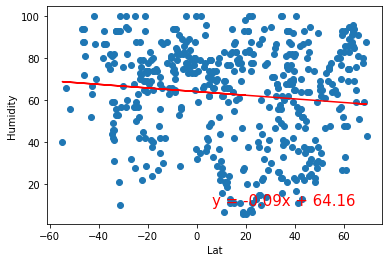

In [59]:
x_values=n_df['Lat']
y_values=n_df['Humidity']
linear_func(x_values,y_values,"Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.1323447607965537


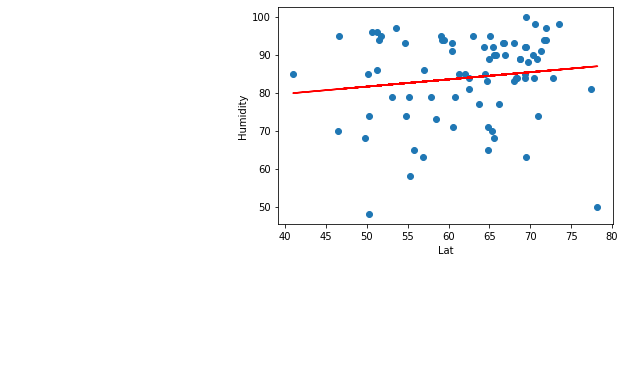

In [60]:
x_values=s_df['Lat']
y_values=s_df['Humidity']
linear_func(x_values,y_values,"Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.03629878262199082


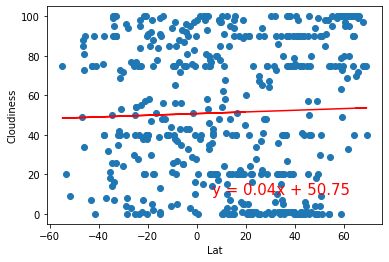

In [61]:
x_values=n_df['Lat']
y_values=n_df['Cloudiness']
linear_func(x_values,y_values,"Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

-0.15971625998605932


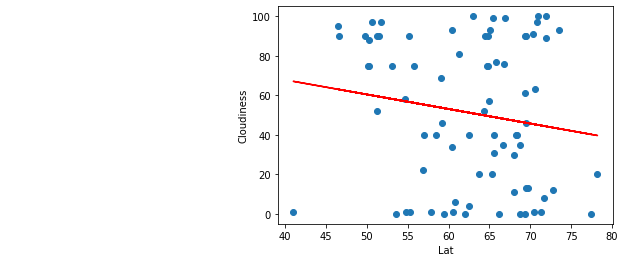

In [62]:
x_values=s_df['Lat']
y_values=s_df['Cloudiness']
linear_func(x_values,y_values,"Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.15953225783834343


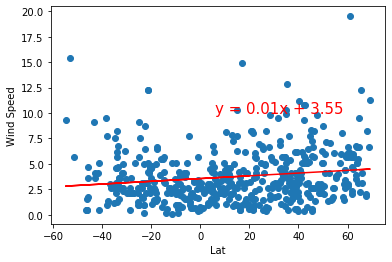

In [63]:
x_values=n_df['Lat']
y_values=n_df['Wind Speed']
linear_func(x_values,y_values,"Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.36492792464917184


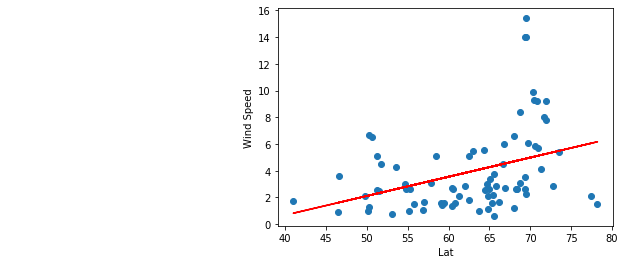

In [64]:
x_values=s_df['Lat']
y_values=s_df['Wind Speed']
linear_func(x_values,y_values,"Wind Speed")